In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel("crowdsource2018_copy.xlsx")
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,days_open,pledged,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state,stateNY
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,58.491343,0.0,0,GB,0.0,0.0,1533.95,failed,No
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,59.802812,2421.0,15,US,100.0,2421.0,30000.00,failed,No
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,44.985532,220.0,3,US,220.0,220.0,45000.00,failed,No


In [3]:
## Exploring the dataset
df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [4]:
df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

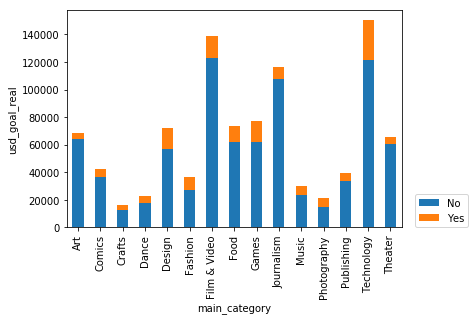

In [5]:
# The proportion of failed/reached goals in each category
df_MI_agg = df.groupby(['main_category','stateNY'])['usd_goal_real'].mean().unstack()
df_MI_agg.plot(kind='bar', stacked=True)
plt.legend(loc=(1.04,0))       # to place the legend OUTSIDE of the axes bounding box
plt.ylabel('usd_goal_real')
plt.savefig('PledgedAmountByResult.png')

In [6]:
# Using numerical features in the model.
# Will add categorical values later.
X_train, X_test, y_train, y_test = train_test_split(df[['usd_goal_real','backers','days_open']],df.stateNY,train_size=0.8, test_size=0.2)

In [7]:
# Linear Regression predicts any real value. 
# logistic regression is one of the simplest and most common approaches to binary classification.
# In Binary Classification, we are predicting just two discrete outcomes (spam, no spam / Yes, No) by calculating the probability of the outcome.

model = LogisticRegression()

In [8]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
X_test

,usd_goal_real,backers,days_open
99487,30000.00,10,31.905255
175966,100.00,0,55.044120
115055,16962.09,7,29.278079
255018,5376.83,135,44.801597
177083,25000.00,0,29.466019
99512,1000.00,6,29.360289
45697,350.00,0,29.927743
347624,3000.00,50,29.186794
56024,3500.00,117,30.993924
226587,30000.00,116,35.513171


In [10]:
y_pred = model.predict(X_test)

In [11]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [12]:
model.predict_proba(X_test)

array([[0.96037032, 0.03962968],
       [0.78717232, 0.21282768],
       [0.88423666, 0.11576334],
       ...,
       [0.6793151 , 0.3206849 ],
       [0.72441771, 0.27558229],
       [0.43365729, 0.56634271]])

In [13]:
model.score(X_test,y_test)

0.8654219428782697